In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from ssif import SSIF
from sklearn.model_selection import train_test_split
import seaborn as sns #if you get error, use the line !pip install seaborn


def ignore_warnings():
    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)
    warnings.simplefilter(action='ignore', category=Warning)

ignore_warnings()

#### Artificial Data

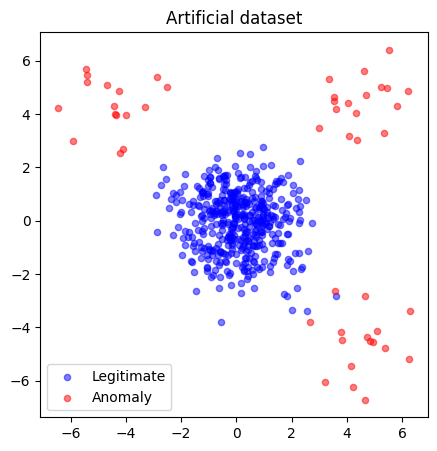

In [49]:
np.random.seed(331)
dataset_size = 500
numerical_col = [r'$X_1$',r'$X_2$']
class_prior = 0.90 #real class prior
contamination = 1-class_prior

a1_ = np.random.randn(2, int(dataset_size*(1-class_prior)/3))
a2_ = np.random.randn(2, int(dataset_size*(1-class_prior)/3))
a3_ = np.random.randn(2, int(dataset_size*contamination) - 2*int(dataset_size*(1-class_prior)/3))
num_anom = a1_.shape[1] + a2_.shape[1]+ a3_.shape[1]

n1_ = np.random.randn(2, int(dataset_size-num_anom))*1.1
y = -1*np.ones(dataset_size, dtype=int)
y[:num_anom] = +1

a1_[0, :] += 4.5
a1_[1, :] -= 4.5
a2_[0, :] -= 4.5
a2_[1, :] += 4.5
a3_[0, :] += 4.5
a3_[1, :] += 4.5

dataset = np.concatenate((a1_, a2_, a3_, n1_), axis=1).T
fig = plt.figure(figsize=(5, 5), facecolor='w', edgecolor='k')
plt.scatter(dataset[:, 0][y==-1], dataset[:, 1][y==-1], 20,"blue", alpha = 0.5, label="Legitimate")
plt.scatter(dataset[:, 0][y==1], dataset[:, 1][y==1], 20, "red", alpha = 0.5, label="Anomaly")
plt.legend(loc=3)
plt.title("Artificial dataset")
plt.show()

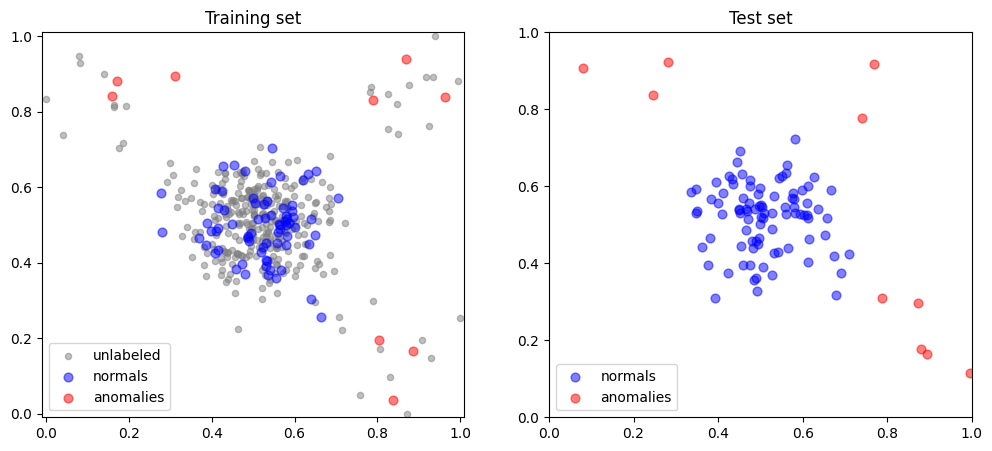

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset, y, test_size=0.2, random_state=331, shuffle=True, stratify=y)

c = 0.2 # select the percentage of labeled instances in the training set
idx_unlabeled = np.random.choice(range(len(Y_train)), int((1-c)*len(Y_train)), replace=False)
Y_train[idx_unlabeled] = 0 # 0:unlabeled, 1:anomaly, -1:normal

# normalize training and test set
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# plot training and test sets
fig = plt.figure(figsize=(12, 5), facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
plt.scatter(X_train[Y_train==0][:, 0], X_train[Y_train==0][:,1], 20, "gray", label="unlabeled", alpha = 0.5)
plt.scatter(X_train[Y_train==-1][:, 0], X_train[Y_train==-1][:,1], 40, "blue", label="normals", alpha = 0.5)
plt.scatter(X_train[Y_train==1][:, 0], X_train[Y_train==1][:,1], 40, "red", label="anomalies", alpha = 0.5)
plt.title("Training set")
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.legend(loc=3)

plt.subplot(1, 2, 2)
plt.scatter(X_test[Y_test==-1][:, 0], X_test[Y_test==-1][:, 1], 40, "blue", label="normals", alpha = 0.5)
plt.scatter(X_test[Y_test==1][:, 0], X_test[Y_test==1][:, 1], 40, "red", label="anomalies", alpha = 0.5)
plt.title("Test set")
plt.legend(loc=3)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show() 

### Model Training 

In [72]:
detector = SSIF()
detector.fit(X_train, Y_train)

In [115]:
train_scores = detector.compute_anomaly_scores(X_train)
train_scores

array([0.4265163 , 0.34530902, 0.26137572, 0.35075218, 0.25121968,
       0.41917606, 0.41829057, 0.28540764, 0.81480975, 0.31681367,
       0.2918932 , 0.28538236, 0.64362973, 0.24234987, 0.42481689,
       0.33245151, 0.30503257, 0.32402989, 0.36998527, 0.38546191,
       0.31912071, 0.66908534, 0.39746067, 0.46820261, 0.30802963,
       0.29690398, 0.32685825, 0.35249605, 0.25110487, 0.37393478,
       0.91749389, 0.30388294, 0.35177204, 0.45040817, 0.287449  ,
       0.31703333, 0.33024147, 0.29735553, 0.3455829 , 0.34131006,
       0.4802661 , 0.34824126, 0.35231729, 0.6917809 , 0.29887852,
       0.2743465 , 0.2760707 , 0.33075976, 0.30441197, 0.2805182 ,
       0.45013212, 0.74758297, 0.33049571, 0.63667733, 0.30075371,
       0.73607358, 0.71137282, 0.79915958, 0.27854717, 0.45076274,
       0.6124547 , 0.29497763, 0.31213453, 0.64462911, 0.32858261,
       0.50006707, 0.24646225, 0.25636845, 0.51203322, 0.35550361,
       0.34428404, 0.3478089 , 0.37987758, 0.40259705, 0.30005

In [116]:
test_scores = detector.compute_anomaly_scores(X_test)
test_scores

array([0.87780775, 0.37210128, 0.36716598, 0.4205904 , 0.32683424,
       0.31483878, 0.30367236, 0.56623173, 0.40993213, 0.3416398 ,
       0.32070237, 0.37206264, 0.29882009, 0.28638243, 0.31462734,
       0.33454271, 0.2895307 , 0.30347629, 0.50632268, 0.33073452,
       0.31830193, 0.31347956, 0.74468886, 0.77714993, 0.28436048,
       0.34615082, 0.29334766, 0.28653411, 0.28212527, 0.45679087,
       0.38011669, 0.34043269, 0.27344023, 0.29867308, 0.63322934,
       0.29690261, 0.30744712, 0.264564  , 0.34713132, 0.3077214 ,
       0.30711282, 0.30219957, 0.4526457 , 0.27850117, 0.25879632,
       0.2896323 , 0.70150847, 0.37234565, 0.40414485, 0.66134472,
       0.43586734, 0.3167219 , 0.52600263, 0.32307932, 0.40048041,
       0.44942001, 0.30457539, 0.35763199, 0.42532468, 0.3740863 ,
       0.31328284, 0.33253635, 0.78624597, 0.30096333, 0.36668911,
       0.31744075, 0.30444737, 0.49235782, 0.34551562, 0.49702218,
       0.38045118, 0.31318001, 0.30775748, 0.39444014, 0.29701

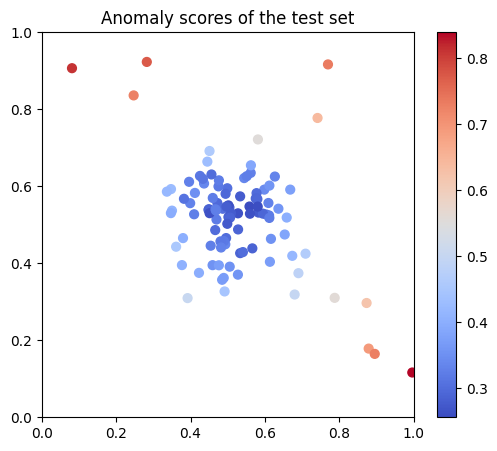

In [112]:
plt.figure(figsize=(6, 5))
plt.title("Anomaly scores of the test set")
plt.scatter(X_test[:,0], X_test[:,1], 40, c=test_scores, cmap=plt.cm.coolwarm)
plt.colorbar()
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

In [114]:
detector

In [113]:
auc = roc_auc_score(Y_test,test_scores)
auc

np.float64(1.0)